Importing the necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

Load the Iris dataset and Display the first 5 rows

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Prepare features and target variables

In [3]:
X = df.drop('species', axis=1)
y = df['species']

Encode the target variable using Label Encoding

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Random Forest Classifier and fit the model on the training data

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Visualize the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

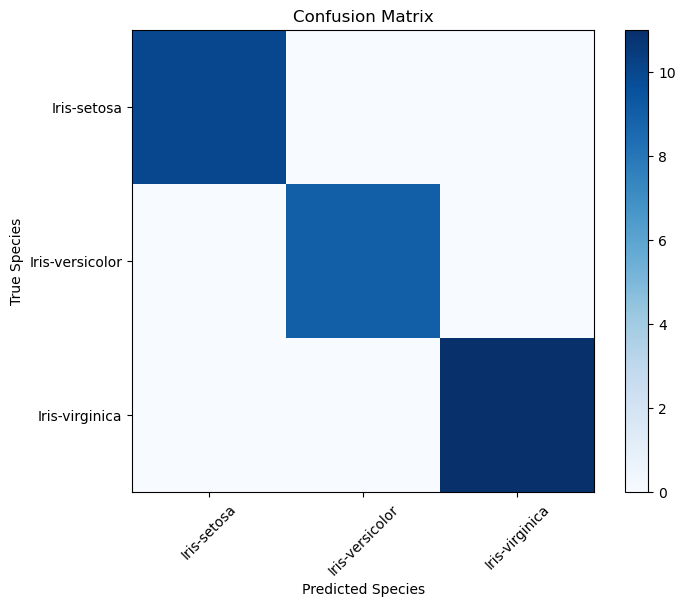

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix')